<a href="https://colab.research.google.com/github/yadavpunam/PCA-Dimensionality-Reduction/blob/main/PCA_comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Principal component Analysis - PCA**

**Objective**

Apply PCA on a dataset for dimensionality reduction and then use PC for predicting target values using any suitable model.(Supervised Learning Model)

**Dataset Information:**

Dataset source: https://www.kaggle.com/datasets/uciml/iris

It includes three iris species with 50 samples each, as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns/features in this dataset are:


Id

SepalLengthCm

SepalWidthCm

PetalLengthCm

PetalWidthCm

Species

**Import required libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

**Loading Dataset**

In [ ]:
# Mount the drive and then load the dataset
from google.colab import drive
drive.mount ('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/ML_data/Iris-1.csv')

Mounted at /content/drive


In [ ]:
# Check first 5 rows of dataset to understand its nature using pandas .head() command
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Species is the Target column.

In [ ]:
# Get the summary of the dataset using .info() command to knoe the no. of rows and columns, datatype and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Identify the shape of the dataset
df.shape

(150, 6)

In [ ]:
# Drop any redundant column
df.drop('Id', axis = 1, inplace = True)   # We drop column 'Id' because it doesn't contribute to analysis

**PCA algorithm**

1) Standardize the data

2) Calculate the covariance matrix

3) Calculate eigenvectors and eigenvalues of the covariance matrix

4) Rank eigenvectors by its corresponding eigenvalues and calculate variance

5) Obtain PC with its column vectors corresponding to the top k eigenvectors

**Step1: Standardize the data**

First step is to standardize the dataset so that PCA works properly.

In [ ]:
# Separate target and independent variables
X = df.drop('Species', axis = 1)
Y = df['Species']

In [ ]:
# Standardize the data using StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977


**Step2: Calculate the covariance matrix**

In [ ]:
# Use np.cov function to calculate the covariance of the all the features
cov_matrix = np.cov(X_scaled.T)
print('Covaiance Matrix','\n', cov_matrix)

Covaiance Matrix 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


The covariance matrix is a square and symmetrical matrix. The diagonal elements represent the feature variance.

**Understanding the data using pairplot**

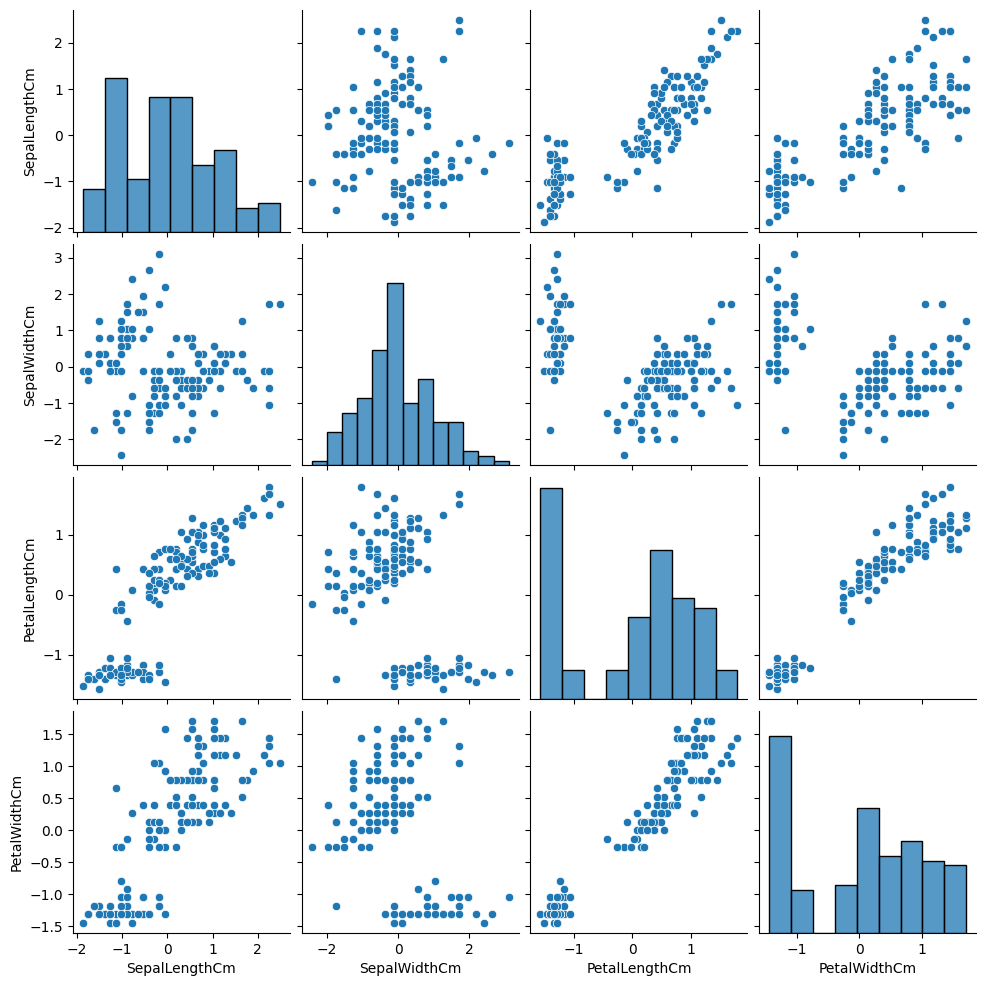

In [ ]:
# You can visualize the Normalised independent features with seaborn pairplot
sns.pairplot(X_scaled)

1. Imp: Do not get confused with the PetalLength or other features in negative. This is due to the normalisation.
2. We observe that the PetalLength has a high covariance with PetalWidth. As the petal length increases so is the increase in petal width.
3. Similarly, PetalLength has a high variance SepalLength.
4. Above observation can be tallied with the covariance matrix already calculated.

**Step3: Calculate the eigenvalues and eigenvectors**

In [ ]:
# Using np.linalg function calculate eigen values and eigen vectors.Eigenvalues represent the scaling factor for a given vector in a linear transformation.
eig_val, eig_vec = np.linalg.eig(cov_matrix)

In [ ]:
print('Eigen Values', '\n', eig_val)
print('\n')
print('Eigen Vectors', '\n', eig_vec)

Eigen Values 
 [2.93035378 0.92740362 0.14834223 0.02074601]


Eigen Vectors 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


Importance of eigen values:

Eigenvalues represent magnitude or importance. Bigger Eigenvalues correlate with more important directions after transformation. Finally, we make an assumption that more variability in a particular direction correlates with explaining the behavior of the dependent variable.

In [ ]:
# To get eigen values in descending order use sorted() with reverse = True
sorted_eig_val = sorted(eig_val, reverse = True)

total = sum(eig_val)
variance = []

for i in sorted_eig_val:
  var = (i/total)*100           # variance = (individual eigen value/ sum of all eigen values)* 100
  variance.append(var)

cum_var = np.cumsum(variance)   # Find the cumulative sum of the variance with the help of np.cumsum function

print('Variance','\n', variance)
print('\n')
print('Cumulative Variance','\n', cum_var)  # Cumulative Variance tells you about how much information/variance is covered by PCs collectively.

Variance 
 [72.77045209380135, 23.03052326768065, 3.683831957627379, 0.5151926808906321]


Cumulative Variance 
 [ 72.77045209  95.80097536  99.48480732 100.        ]


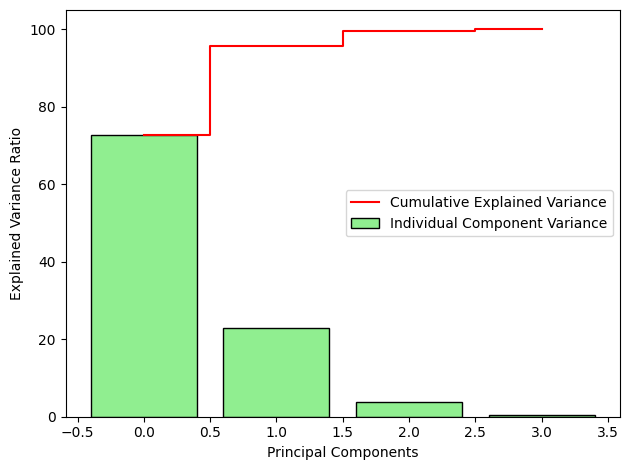

In [ ]:
# Plot a scree plot to help you in visualizing how many PCs you want to select
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')

plt.bar(range(4), variance, align = 'center',color = 'lightgreen', edgecolor = 'black', label = 'Individual Component Variance')
plt.step(range(4), cum_var, where = 'mid', color = 'red', label = 'Cumulative Explained Variance')
plt.legend(loc = 'best')
plt.tight_layout()

**Interpretation**

First three principal components explain 99.48% of the variance in the data.

So, we can choose the optimal number of principal components as 3

**Now, Lets build a KNN classifier model by applying PCA**

**KNN model algorithm while using PCs**

1) Split the data

2) Scale/normalize the data

3) Apply PCA model on the data

4) Build KNN classifier model

5) Predict the target label and check accuracy using different metrices.

**Split and scale the dataset**

In [ ]:
# Separate the independent features and the target variable.
X = df.drop('Species', axis = 1)
Y = df['Species']

# Split the dataset into train and test
X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size= 0.2, random_state = 42)

# Scale the independent feature using StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)         # Traing data has to be fit and transformed while test data should only be transformed so as to not disclose our test data to the model.
X_test = ss.transform(X_test)

# Form a dataframe with the standardized data
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

**Lets apply PCA model on the data (with PC= 3, which covers 99% variance) and build a KNN classifier model**

In [ ]:
# Apply PCA model on the data
pca = PCA(n_components = 3)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Instantiate KNN Classifier
knn = KNeighborsClassifier()

# We first create an instance of the kNN model, then fit this to our training data. We pass both the features and the target variable, so the model can learn.
knn.fit(X_train_pca, Y_train)


KNeighborsClassifier()

In [ ]:
# The model is now trained! We can make predictions on the train and test dataset, which we can use later to score the model's train and test accuracy.

Y_train_pred = knn.predict(X_train_pca)
Y_test_pred = knn.predict(X_test_pca)

In [ ]:
# Let us check the accuracy for train and test data
print('Train_accuracy:' , accuracy_score(Y_train, Y_train_pred))
print('Test_accuracy', accuracy_score(Y_test, Y_test_pred))

Train_accuracy: 0.975
Test_accuracy 1.0


**Lets apply PCA model on the data (with PC= 2 which covers 95% variance) and build a KNN classifier model and check the training as well as testing accuracy with the previous model with PC = 3.**

In [ ]:
# Building a PCA model with PC= 2
pca2 = PCA(n_components = 2)

# Fitting and transforming both the train and test data with reduced dimensionality
X_train_pca2 = pca2.fit_transform(X_train)
X_test_pca2 = pca2.transform(X_test)


In [ ]:
# Fitting the knn model on both the independent variable and the target variable of the target variable of the training set so that the model learns.
knn.fit(X_train_pca2, Y_train)

KNeighborsClassifier()

In [ ]:
# The model is now ready to predict both the train and test target values.
Y_train_pred2 = knn.predict(X_train_pca2)
Y_test_pred2 = knn.predict(X_test_pca2)

In [ ]:
# Finding the accuracy score for both the train and test target values.
print('PC2 Train Accuracy: ', accuracy_score(Y_train, Y_train_pred2))
print('PC2 Test Accuracy: ', accuracy_score(Y_test, Y_test_pred2))


PC2 Train Accuracy:  0.925
PC2 Test Accuracy:  0.9333333333333333


**Inference:**

It is observed that when you reduce the PCs to 2 from 3 (earlier), the accuracy score gets compromised from 97.5% to 92.5% for the training data. Similarly the testing accuracy also reduces from 100% to 93.3%.

This proves that dimensionality reduction has to be handled carefully because it may result into loss of information as well as poor accuracy scores.

**Notes**

**Advantages of PCA:**

1) Principal Component Analysis (PCA) is very useful to speed up the computation by reducing the dimensionality of the data.

2) If you have high dimensionality data with highly correlated variables with one another, the PCA can improve the accuracy of classification model by reducing the dimensionality, by getting rid of redundant features. Thus we can say that PCA has the ability to produce independent, uncorrelated features of the data.

3) PCA results in reduction of noise in the data.


**Diadvantages:**

1) Loss of information: PCA may lead to loss of some information from the original data, as it reduces the dimensionality of the data.

2) Interpretability: The principal components generated by PCA are linear combinations of the original variables, and their interpretation may not be straightforward.

3) Outliers: PCA is sensitive to outliers, and their presence in the data can affect the results.

**Happy to learn :)**